In [56]:
import pandas as pd
import re
from os import listdir,path
import numpy as np
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data
from datetime import datetime, timedelta



# files=['AAPL','ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'ALGN', 'ALXN', 'AMAT',
#        'AMGN', 'AMZN', 'ATVI', 'AVGO', 'BIDU',  'BIIB', 'BMRN', 'CA', 'CELG',
#        'CERN', 'CHTR', 'CMCSA', 'COST', 'CSCO', 'CSX', 'CTAS', 'CTRP', 'CTSH',
#        'CTXS','DISCA', 'DISH', 'DLTR', 'EA', 'EBAY', 'ESRX', 'EXPE','FAST', 'FB',
#        'FISV', 'FOXA', 'GILD', 'GOOGL', 'HAS','HOLX', 'HSIC', 'IDXX', 'ILMN', 'INCY',
#        'INTC', 'INTU','ISRG', 'JBHT', 'JD', 'KHC', 'KLAC', 'LBTYA', 'LRCX', 'MAR','MAT',
#        'MCHP', 'MDLZ', 'MELI', 'MNST', 'MSFT', 'MU', 'MXIM','MYL', 'NFLX', 'NTES', 'NVDA', 'ORLY',
#        'PAYX', 'PCAR', 'PCLN', 'PYPL', 'QCOM', 'REGN', 'ROST', 'SBUX', 'SHPG', 'SIRI', 'STX','SWKS',
#        'SYMC', 'TMUS', 'TSCO', 'TSLA', 'TXN', 'ULTA', 'VIAB', 'VOD', 'VRSK', 'VRTX', 'WBA', 'WYNN', 'XLNX', 'XRAY']

files = ['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX']


for file in files:
    print(file)

    param = {
    'q': file, # Stock symbol (ex: "AAPL")
    'i': "3600", # Interval size in seconds ("86400" = 1 day intervals)
    'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
    'p': "4Y" # Period (Ex: "1Y" = 1 year)
    }
    
    if(path.isfile('/home/simone/Desktop/NLFF/indexes/indexes'+file+'.csv')):
        lenghtCheck= len(pd.read_csv('/home/simone/Desktop/NLFF/indexes/indexes'+file+'.csv'))
    else:
        lenghtCheck = 0
    if(lenghtCheck ==0):
        print('request..')
        # link to doc http://www.networkerror.org/component/content/article/1-technical-wootness/44-googles-undocumented-finance-api.html
        # get price data (return pandas dataframe) 1465948800
        priceData = get_price_data(param)
        #print(priceData)
        stock = StockDataFrame.retype(priceData)
        #print(stock)

        toSave = pd.DataFrame(stock)
        toSave['date'] = ''
        toSave['date'] = toSave.index
        toSave['date']  = [row - timedelta(hours=8) for row in toSave['date']]


        idxs = np.array(['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6'])
        #print(idxs)
        for index,x in np.ndenumerate(idxs):
            toSave = pd.concat([toSave, pd.DataFrame(stock.get(x))], axis=1)
            
        toSave = toSave.reset_index(drop=True)
        toSave = toSave[['date','open','high','low','close','volume','close_12_ema','close_26_ema','macd','macds','macdh','macd','macds','boll_ub','boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6']]
        toSave.to_csv('/home/simone/Desktop/NLFF/indexes/indexes'+file+'.csv')


AAPL
AMZN
GOOGL
MSFT
FB
INTC
CSCO
CMCSA
NVDA
NFLX


=== CONTROLLO 1: lunghezze tutte lunghi uguali
AAPL 6013
AMZN 6013
GOOGL 6013
MSFT 6013
FB 6013
INTC 6013
CSCO 6013
CMCSA 6013
NVDA 6013
NFLX 6013
=== CONTROLLO 2: differenze tra timestamp successivi non strane
2015-02-02 15:00:00 2015-02-02 16:00:00 1:00:00
2015-02-02 21:00:00 2015-02-03 15:00:00 18:00:00
2015-02-06 21:00:00 2015-02-09 15:00:00 2 days, 18:00:00
2015-02-13 21:00:00 2015-02-17 15:00:00 3 days, 18:00:00
2015-03-06 21:00:00 2015-03-09 14:00:00 2 days, 17:00:00
2015-10-30 20:00:00 2015-11-02 15:00:00 2 days, 19:00:00
2015-11-25 21:00:00 2015-11-27 15:00:00 1 day, 18:00:00
2015-11-27 18:00:00 2015-11-30 15:00:00 2 days, 21:00:00
2015-12-24 18:00:00 2015-12-28 15:00:00 3 days, 21:00:00
2017-07-03 17:00:00 2017-07-05 14:00:00 1 day, 21:00:00
2017-12-07 16:00:00 2017-12-07 18:00:00 2:00:00
2017-12-07 19:00:00 2017-12-08 15:00:00 20:00:00
differenza,#timesteps
1:00:00 5150
18:00:00 678
2 days, 18:00:00 142
3 days, 18:00:00 25
2 days, 17:00:00 4
2 days, 19:00:00 3
1 day, 18:00:0

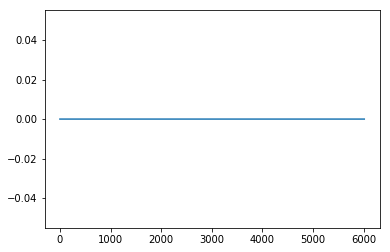

2 6013


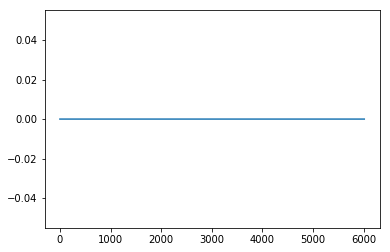

3 6013


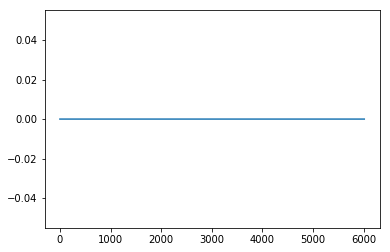

4 6013


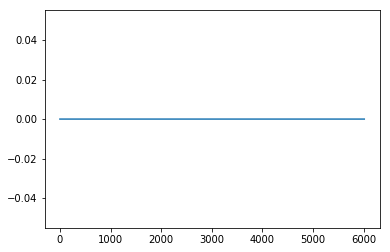

5 6013


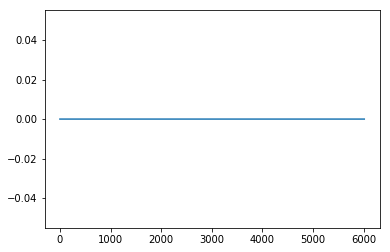

6 6013


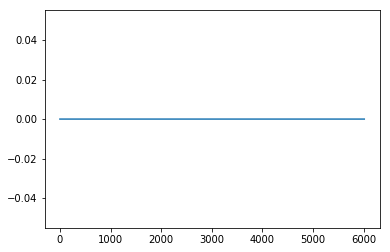

7 6013


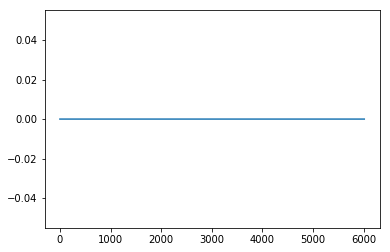

8 6013


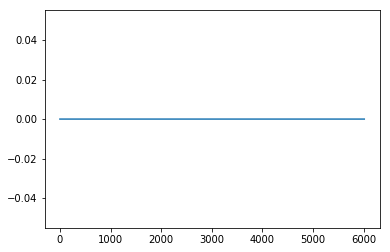

9 6013


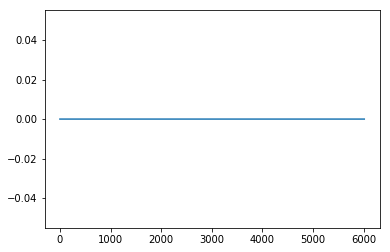

In [124]:
import matplotlib.pyplot as plt

#
# CONTROLLI
#
files = ['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX']
timeSpan = list()
for file in files:
    news = pd.read_csv('/home/simone/Desktop/NLFF/indexes/indexes'+file+'.csv')
    timeSpan.append([datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in news['date']])

print('=== CONTROLLO 1: lunghezze tutte lunghi uguali')
for i in range(len(timeSpan)):
        print(files[i],len(timeSpan[i]))

#transpose list from tickers x time to time x tickers
timeSpan = list(map(list, zip(*timeSpan)))


print('=== CONTROLLO 2: differenze tra timestamp successivi non strane')
steps = {}
for i in range(len(timeSpan)-1):
    diff = timeSpan[i+1][0]-timeSpan[i][0]
    if diff in steps:
        steps[diff]+=1
    else:
        print(timeSpan[i][0],timeSpan[i+1][0],diff)
        steps[diff] = 1
print('differenza,#timesteps')
for key, value in steps.items():
    print(key,value)
    
print('=== CONTROLLO 3: stessi timestamps tra le stock')
differences = np.zeros([10,len(timeSpan)])
for i in range(len(timeSpan)):
    for j in range(0,10):
        a = timeSpan[i][0]-timeSpan[i][j]
        if(timeSpan[i][0] != timeSpan[i][j] and j == 2):
            print(timeSpan[i][0],j)
        differences[j][i] = a.total_seconds()/3600
        if(differences[j][i]!=0):
            print(j,timeSpan[i][0],timeSpan[i][0])

for k in range(1,10):
    a = differences[k]
    i = 0
    while(i<len(a) and a[i]==0):
        i+=1
    print(k,i)
    plt.plot(a)
    plt.show()
    
for i in range(len(timeSpan)):
    if(not timeSpan[i][0]==timeSpan[i][1]==timeSpan[i][2]==timeSpan[i][3]==timeSpan[i][4]==timeSpan[i][5]
       ==timeSpan[i][6]==timeSpan[i][7]==timeSpan[i][8]==timeSpan[i][9]):
        print('diversi',timeSpan[i][0],i)

In [125]:
#
#
#
# /!\ NOTA: in caso di rifacimento del dataset
# I controlli sopra hanno rivelato che, non si sa perche' ma alcuni ticker finiscono
# fuori sincro per il timestep '2016-11-25 19:00:00' che alcuni non hanno ed alcuni si
# nel dataset attuale e' stato manualmente tolto da tutti
#
#


In [2]:
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data
from stockstats import StockDataFrame 
from datetime import datetime, timedelta
param = {
'q': "AAPL", # Stock symbol (ex: "AAPL")
'i': "3600", # Interval size in seconds ("86400" = 1 day intervals)
'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
'p': "1Y" # Period (Ex: "1Y" = 1 year)
}

# link to doc http://www.networkerror.org/component/content/article/1-technical-wootness/44-googles-undocumented-finance-api.html
# get price data (return pandas dataframe) 1465948800
priceData = get_price_data(param)
#print(priceData)
stock = StockDataFrame.retype(priceData)
stock.head()

,open,high,low,close,volume
2017-07-10 22:00:00,144.110,144.530,143.37,143.4600,2533945
2017-07-10 23:00:00,143.450,144.900,143.43,144.8306,2853494
2017-07-11 00:00:00,144.839,144.990,144.68,144.8450,1779224
2017-07-11 01:00:00,144.840,145.520,144.80,145.5000,2206868
2017-07-11 02:00:00,145.510,145.875,145.47,145.8655,1746694


In [3]:
priceData.head()

,open,high,low,close,volume
2017-07-10 22:00:00,144.110,144.530,143.37,143.4600,2533945
2017-07-10 23:00:00,143.450,144.900,143.43,144.8306,2853494
2017-07-11 00:00:00,144.839,144.990,144.68,144.8450,1779224
2017-07-11 01:00:00,144.840,145.520,144.80,145.5000,2206868
2017-07-11 02:00:00,145.510,145.875,145.47,145.8655,1746694
